In [1]:
import numpy as np
import pickle
from features.ThreeDMSDFeatureCreator import ThreeDMSDFeatureCreator
from normalizefeatures.DoNothingNormalization import DoNothingNormalization
from datasets.SyntheticDatasetSubset import SyntheticDatasetSubset
from datasets.SyntheticDataset import SyntheticDataset
import sklearn.linear_model
from algorithms.LogisticRegression import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


from standardizefeaturesnumber.Extract40ValsRegularInterval import Extract40ValsRegularInterval

In [2]:
dataset = SyntheticDataset()
categories = dataset.getCategoriesWithPoints()

normalizeFeatures = DoNothingNormalization()
standardizeFeatures = Extract40ValsRegularInterval()
featureCreator = ThreeDMSDFeatureCreator()
algorithm = LogisticRegression()

In [3]:
labelFile = open("label.pkl", "rb")
loadedLabels = pickle.load(labelFile)
labelFile.close()

dataFile = open("data.pkl", "rb")
loaded_dataSet = pickle.load(dataFile)
dataFile.close()

In [4]:
dataSet = normalizeFeatures.normalizeToSetOfFeatures(loaded_dataSet)
dataSet = standardizeFeatures.standardizeSetOfFeatures(loaded_dataSet)
X_train, X_rem, y_train, y_rem = train_test_split(dataSet, loadedLabels, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

In [5]:
yTrain = []
for i in y_train:
    if i == [1.0, 0.0, 0.0, 0.0]:
        yTrain.append(1)
    elif i == [0.0, 1.0, 0.0, 0.0]:
        yTrain.append(2)
    elif i == [0.0, 0.0, 1.0, 0.0]:
        yTrain.append(3)
    elif i == [0.0, 0.0, 0.0, 1.0]:
        yTrain.append(4)

yTest = []
for i in y_test:
    if i == [1.0, 0.0, 0.0, 0.0]:
        yTest.append(1)
    elif i == [0.0, 1.0, 0.0, 0.0]:
        yTest.append(2)
    elif i == [0.0, 0.0, 1.0, 0.0]:
        yTest.append(3)
    elif i == [0.0, 0.0, 0.0, 1.0]:
        yTest.append(4)

yValid = []
for i in y_valid:
    if i == [1.0, 0.0, 0.0, 0.0]:
        yValid.append(1)
    elif i == [0.0, 1.0, 0.0, 0.0]:
        yValid.append(2)
    elif i == [0.0, 0.0, 1.0, 0.0]:
        yValid.append(3)
    elif i == [0.0, 0.0, 0.0, 1.0]:
        yValid.append(4)

In [6]:
algorithm.train(X_train, y_train)

In [7]:
test_result = algorithm.predict(X_test)
train_result = algorithm.predict(X_train)
valid_result = algorithm.predict(X_valid)

In [8]:
print("Training Accuracy:", metrics.accuracy_score(yTrain, train_result))
print("Test Accuracy:", metrics.accuracy_score(yTest, test_result))
print("Validation Accuracy:", metrics.accuracy_score(yValid, valid_result))

Training Accuracy: 1.0
Test Accuracy: 0.9958333333333333
Validation Accuracy: 0.9991666666666666


In [9]:
training_check_array = (yTrain == train_result)
testing_check_array = (yTest == test_result)
validation_check_array = (yValid == valid_result)
training_incorrect = []
testing_incorrect = []
validation_incorrect = []
for index, g in enumerate(training_check_array):
    if not g:
        training_incorrect.append(index)
for index, g in enumerate(testing_check_array):
    if not g:
        testing_incorrect.append(index)
for index, g in enumerate(validation_check_array):
    if not g:
        validation_incorrect.append(index)

In [10]:
print(training_incorrect)
for i in training_incorrect:
    print(yTrain[i])
for i in training_incorrect:
    print(train_result[i])
print()

print(testing_incorrect)
for i in testing_incorrect:
    print(yTest[i])
for i in testing_incorrect:
    print(test_result[i])
print()

print(validation_incorrect)
for i in validation_incorrect:
    print(yValid[i])
for i in validation_incorrect:
    print(valid_result[i])

[]

[91, 111, 718, 1077, 1176]
3
3
3
3
3
2
2
2
2
2

[913]
3
2


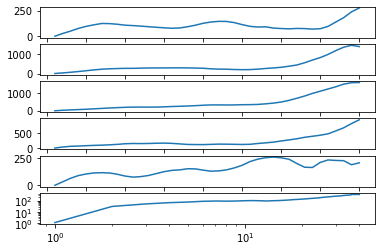

In [11]:
from matplotlib import pyplot as plt

sum = len(training_incorrect) + len(testing_incorrect) + len(validation_incorrect)
if sum != 0:
    fig, ax = plt.subplots(sum,squeeze=False)
    ax = ax.flatten()
    plt.yscale('log')
    plt.xscale('log')
    i = 0
    while i < sum:
        for j in training_incorrect:
            xPoints = np.arange(1,len(X_train[j])+1)
            yPoints = X_train[j]
            ax[i].plot(xPoints, yPoints)
            i += 1
        for j in testing_incorrect:
            xPoints = np.arange(1,len(X_test[j])+1)
            yPoints = X_test[j]
            ax[i].plot(xPoints, yPoints)
            i += 1
        for j in validation_incorrect:
            xPoints = np.arange(1,len(X_valid[j])+1)
            yPoints = X_valid[j]
            ax[i].plot(xPoints, yPoints)
            i += 1
    plt.show